# Warm up
Let's start with some warm up exercises to get you familiar with the database and do some SQL querying.
Make sure to have downloaded the NBA dataset form Kaggle as described in the README.

In [143]:
import sqlite3 as sql
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

## TODO: Use pathlib to get the path to the data directory. Path(__file__) won't work in a Jupyter notebook.
DATA_PATH = Path.cwd() / 'data'

## Create a SQLite connection and run some SQL queries

In [144]:
con = sql.connect("data/nba.sqlite")  # connect to the database
query = 'SELECT * FROM game LIMIT 10'  # write a query that selects the first 10 rows from the game table
top_10_game = pd.read_sql(query, con)  # read the query into a pandas dataframe
top_10_game.head()  # print the dataframe

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,0024600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,None,None,None,None,None,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,0024600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,None,None,None,None,None,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,0024600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,None,None,None,None,None,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,0024600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,None,None,None,None,None,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,0024600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,None,None,None,None,None,NaN,50.0,17,0,Regular Season


In [145]:
# let's look at the schema of the database
# TODO: sqlite_master is the name of the table you want to inspeact: Replace TABLE_NAME with the name of the table you want to inspect
query = """
SELECT name
FROM sqlite_master
WHERE type='table';
"""
pd.read_sql(query, con).sort_values('name')


,name
10,common_player_info
13,draft_combine_stats
14,draft_history
0,game
5,game_info
1,game_summary
4,inactive_players
6,line_score
3,officials
2,other_stats


In [146]:
# let's see all the tables we have in the database
# TODO: Filter for tables only
query = """
SELECT name
FROM sqlite_master
WHERE type='table';
"""

pd.read_sql(query, con)


,name
0,game
1,game_summary
2,other_stats
3,officials
4,inactive_players
5,game_info
6,line_score
7,play_by_play
8,player
9,team


In [147]:
# let's have a look at the columns in the game table
query = """
    PRAGMA table_info(draft_combine_stats)
"""
pd.read_sql(query, con)

,cid,name,type,notnull,dflt_value,pk
0,0,season,TEXT,0,None,0
1,1,player_id,TEXT,0,None,0
2,2,first_name,TEXT,0,None,0
3,3,last_name,TEXT,0,None,0
4,4,player_name,TEXT,0,None,0
5,5,position,TEXT,0,None,0
6,6,height_wo_shoes,REAL,0,None,0
7,7,height_wo_shoes_ft_in,TEXT,0,None,0
8,8,height_w_shoes,REAL,0,None,0
9,9,height_w_shoes_ft_in,TEXT,0,None,0


In [148]:
# let's find the earliest recorded game
query = """
    SELECT game_date
    FROM game
    ORDER BY game_date
    LIMIT 1
"""

print(pd.read_sql(query, con))

# let's find the latest recorded game
query = """
    SELECT game_date
    FROM game
    ORDER BY game_date DESC
    LIMIT 1 
"""

print(pd.read_sql(query, con))


             game_date
0  1946-11-01 00:00:00
             game_date
0  2023-06-12 00:00:00


In [158]:
# TODO: Find four interesting facts about the data and write a query to find the answer

#Insight 1: Which home team has the most home wins?

query = """
   SELECT team_name_home AS home_team, COUNT(*) AS wins_as_home
FROM game
WHERE wl_home = 'W'
GROUP BY home_team
ORDER BY wins_as_home DESC
LIMIT 10;
"""

print(pd.read_sql(query, con))
df = pd.read_sql(query, con)



                home_team  wins_as_home
0          Boston Celtics          2200
1      Los Angeles Lakers          1850
2         New York Knicks          1763
3         Detroit Pistons          1522
4            Phoenix Suns          1480
5      Philadelphia 76ers          1467
6       San Antonio Spurs          1448
7           Chicago Bulls          1443
8         Milwaukee Bucks          1425
9  Portland Trail Blazers          1422


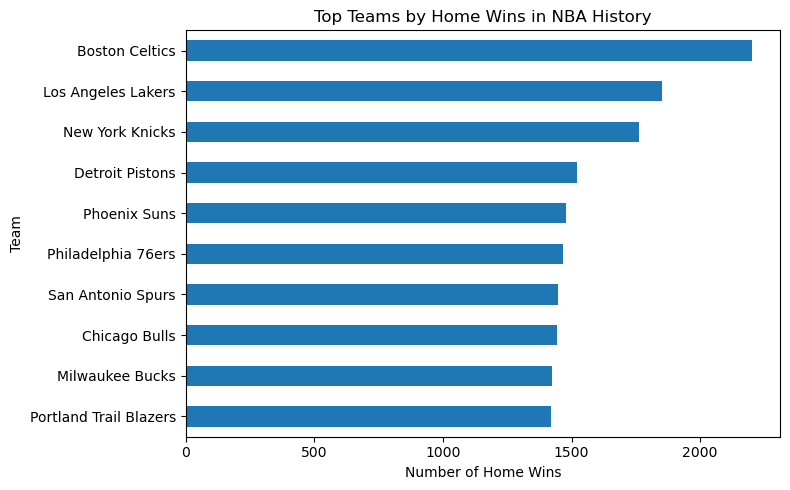

In [160]:

df.plot(kind="barh", x="home_team", y="wins_as_home", legend=False, figsize=(8,5))
plt.title("Top Teams by Home Wins in NBA History")
plt.xlabel("Number of Home Wins")
plt.ylabel("Team")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()



**Insight1 : Teams with the Most Home Wins in NBA History.**

The results show that the **Boston Celtics** have the highest number of home wins in NBA history, followed by the **Los Angeles Lakers** and the **New York Knicks**. These teams are among the league's oldest and most historically successful franchises, meaning they have had **more seasons and more opportunities to accumulate wins**.

Teams such as the **Detroit Pistons**, **Phoenix Suns**, and **Philadelphia 76ers** also rank highly, reflecting their long franchise histories and extended periods of competitive performance.


In [161]:
#Insight 2: Which away team has the most away wins?
query = """
SELECT team_name_away AS away_team,
       COUNT(*) AS wins_as_away
FROM game
WHERE wl_away = 'W'
GROUP BY away_team
ORDER BY wins_as_away DESC
LIMIT 10;
"""

df2 = pd.read_sql(query, con)
print(df2)


            away_team  wins_as_away
0      Boston Celtics          1425
1  Los Angeles Lakers          1273
2     New York Knicks          1100
3  Philadelphia 76ers           995
4   San Antonio Spurs           979
5        Phoenix Suns           944
6       Chicago Bulls           934
7     Detroit Pistons           926
8     Milwaukee Bucks           920
9     Houston Rockets           908


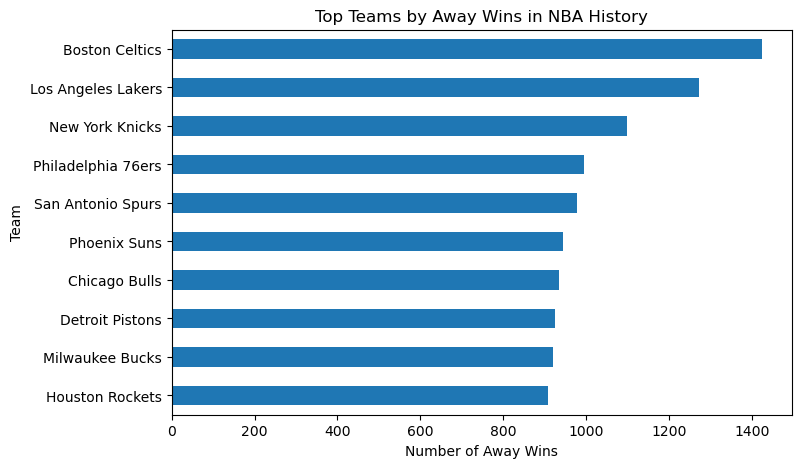

In [162]:
df2.plot(kind="barh", x="away_team", y="wins_as_away", legend=False, figsize=(8,5))
plt.title("Top Teams by Away Wins in NBA History")
plt.xlabel("Number of Away Wins")
plt.ylabel("Team")
plt.gca().invert_yaxis()
plt.show()


**Insight 2: Teams with the Most Away Wins.**

The Boston Celtics lead NBA history in **away wins** with **1425**, followed by the Los Angeles Lakers (1273) and the New York Knicks (1100). This ranking is similar to the home-win leaderboard, indicating that historically strong franchises tend to perform well both at home and on the road.

However, each team shows a **significant gap between home and away wins**. For example, the Celtics have **over 2200 home wins** but only **1425 away wins**, highlighting the persistent and meaningful **home-court advantage** in the NBA.


In [164]:
# Insight3：How NBA Scoring Has Changed Over Time
query = """
SELECT 
    strftime('%Y', gs.game_date_est) AS year,
    AVG(g.pts_home + g.pts_away) AS avg_points
FROM game AS g
JOIN game_summary AS gs
    ON g.game_id = gs.game_id
GROUP BY year
ORDER BY year;
"""

df3 = pd.read_sql(query, con)
df3.head()



,year,avg_points
0,1946,129.475728
1,1947,141.109705
2,1948,151.811475
3,1949,161.037129
4,1950,161.380282


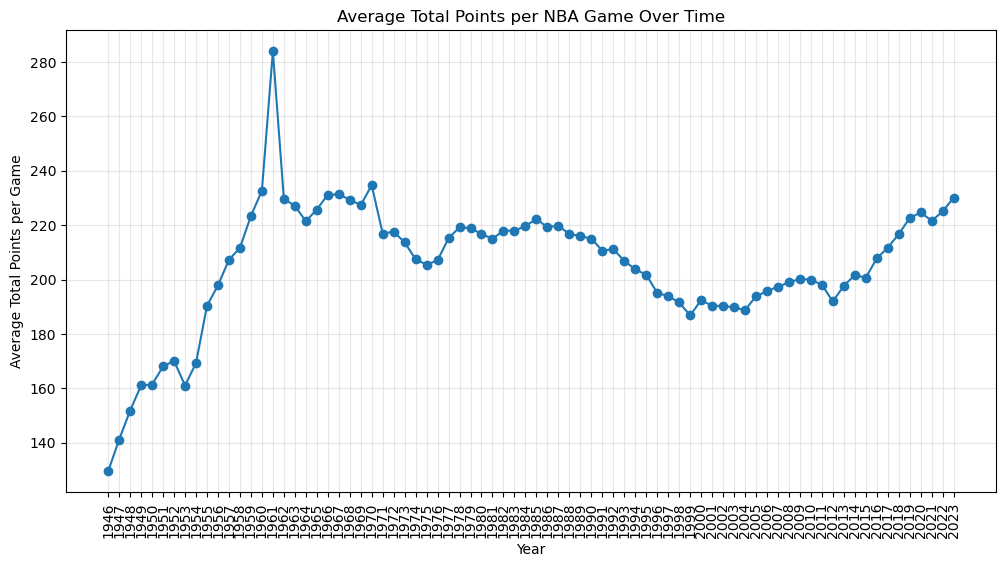

In [165]:
plt.figure(figsize=(12,6))
plt.plot(df3['year'], df3['avg_points'], marker='o')
plt.title('Average Total Points per NBA Game Over Time')
plt.xlabel('Year')
plt.ylabel('Average Total Points per Game')
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.show()


**Insight 3: The average total points scored per NBA game have changed significantly across different eras.**

Based on the line chart, we observe three major scoring periods:

1. **Early Growth Era (1940s–1960s):**  
   Average scoring gradually increased as the league expanded, offensive skills improved, and gameplay pace accelerated.

2. **Defensive / Physical Era (Late 1970s–Early 2000s):**  
   After reaching a peak around the early 1960s, average scoring declined and remained lower for several decades.  
   This period was characterized by slower pace, stronger physical defense, and more half-court play.

3. **Modern Pace-and-Space Era (2010s–Present):**  
   In recent years, scoring has risen sharply.  
   This aligns with:
   - The increased use of the 3-point shot  
   - Faster offensive pace  
   - Rule changes that favor offensive flow  
   - Analytics encouraging spacing and efficient shot selection  

**Conclusion:**  
NBA scoring trends reflect strategic and stylistic evolution in the league.  
The recent rise in scoring suggests that modern basketball emphasizes speed, spacing, ball movement, and shooting efficiency far more than previous eras.


In [166]:
#Insight 4: Which Position Has the Most Players?
query = """
SELECT
    position,
    COUNT(*) AS player_count
FROM draft_combine_stats
GROUP BY position
ORDER BY player_count DESC;
"""

df4 = pd.read_sql(query, con)
print(df4)


   position  player_count
0        PF           289
1        PG           263
2        SG           239
3        SF           194
4         C           135
5     SG-SF            95
6      PF-C            83
7     PG-SG            63
8     SF-PF            62
9      C-PF            62
10    PF-SF            55
11    SF-SG            48
12    SG-PG            40
13                      5


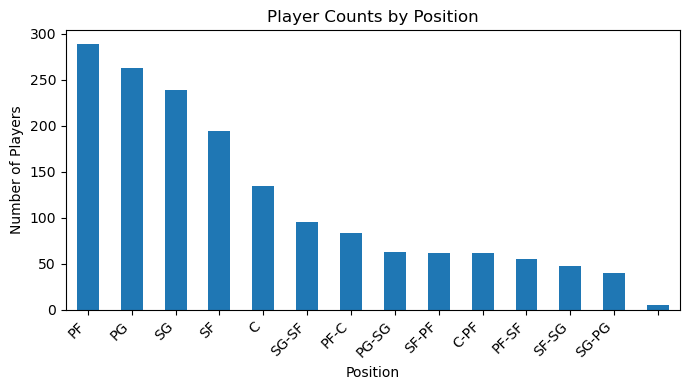

In [167]:
df4.plot(kind="bar", x="position", y="player_count", legend=False, figsize=(7,4))
plt.title("Player Counts by Position")
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Insight 4: The most frequent position is Power Forwards.**  

Power Forwards (PF) appear most frequently in the draft combine data, followed by Point Guards (PG) and Shooting Guards (SG). Centers (C) and Small Forwards (SF) occur less often, and hybrid positions (e.g., SG-SF, PF-C) have significantly smaller counts. This suggests that teams tend to evaluate and draft more forwards and guards, while traditional centers and multi-position roles are less represented in the combine records.
